In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('db_extract/df_individuals_score.csv', index_col = [0])

data.region_name.unique()

array(['German world', 'Germany', 'Northwestern Europe', 'Western Europe',
       'Northern France', 'France', 'Southern Italy', 'Italy',
       'Southwestern Europe', 'Northern Italy', 'Austria',
       'Low countries', 'Netherlands', 'Central Europe', 'Eastern Europe',
       'Ottoman world', 'Arabian peninsula', 'Arabic world',
       'Muslim world', 'British Islands', 'United Kingdom', 'Spain',
       'East Slavic', 'South East Asia', 'Belgium', 'Central America',
       'North America', 'Nordic countries', 'Sweden', 'Denmark', 'Norway',
       'Southern France', 'Latin World', 'mediterranean World',
       'South America', 'Northern India', 'Indian world', 'Persian world',
       'Oceania', 'Switzerland', 'Balkans', 'Greece', 'Greek World',
       'Japan', 'Portugal', 'Ireland', 'Southern China', 'Yangtze',
       'Chinese world', 'Northern China', 'Southern Japan', 'Africa',
       'Iceland', 'Finland', 'Southern India', 'Northern Japan', 'Korea',
       'Ottoman Turkey', 'Slav w

mall shifts of individuals between neighboring regions don't fundamentally change the overall patterns. Let me work through this step by step in Python.

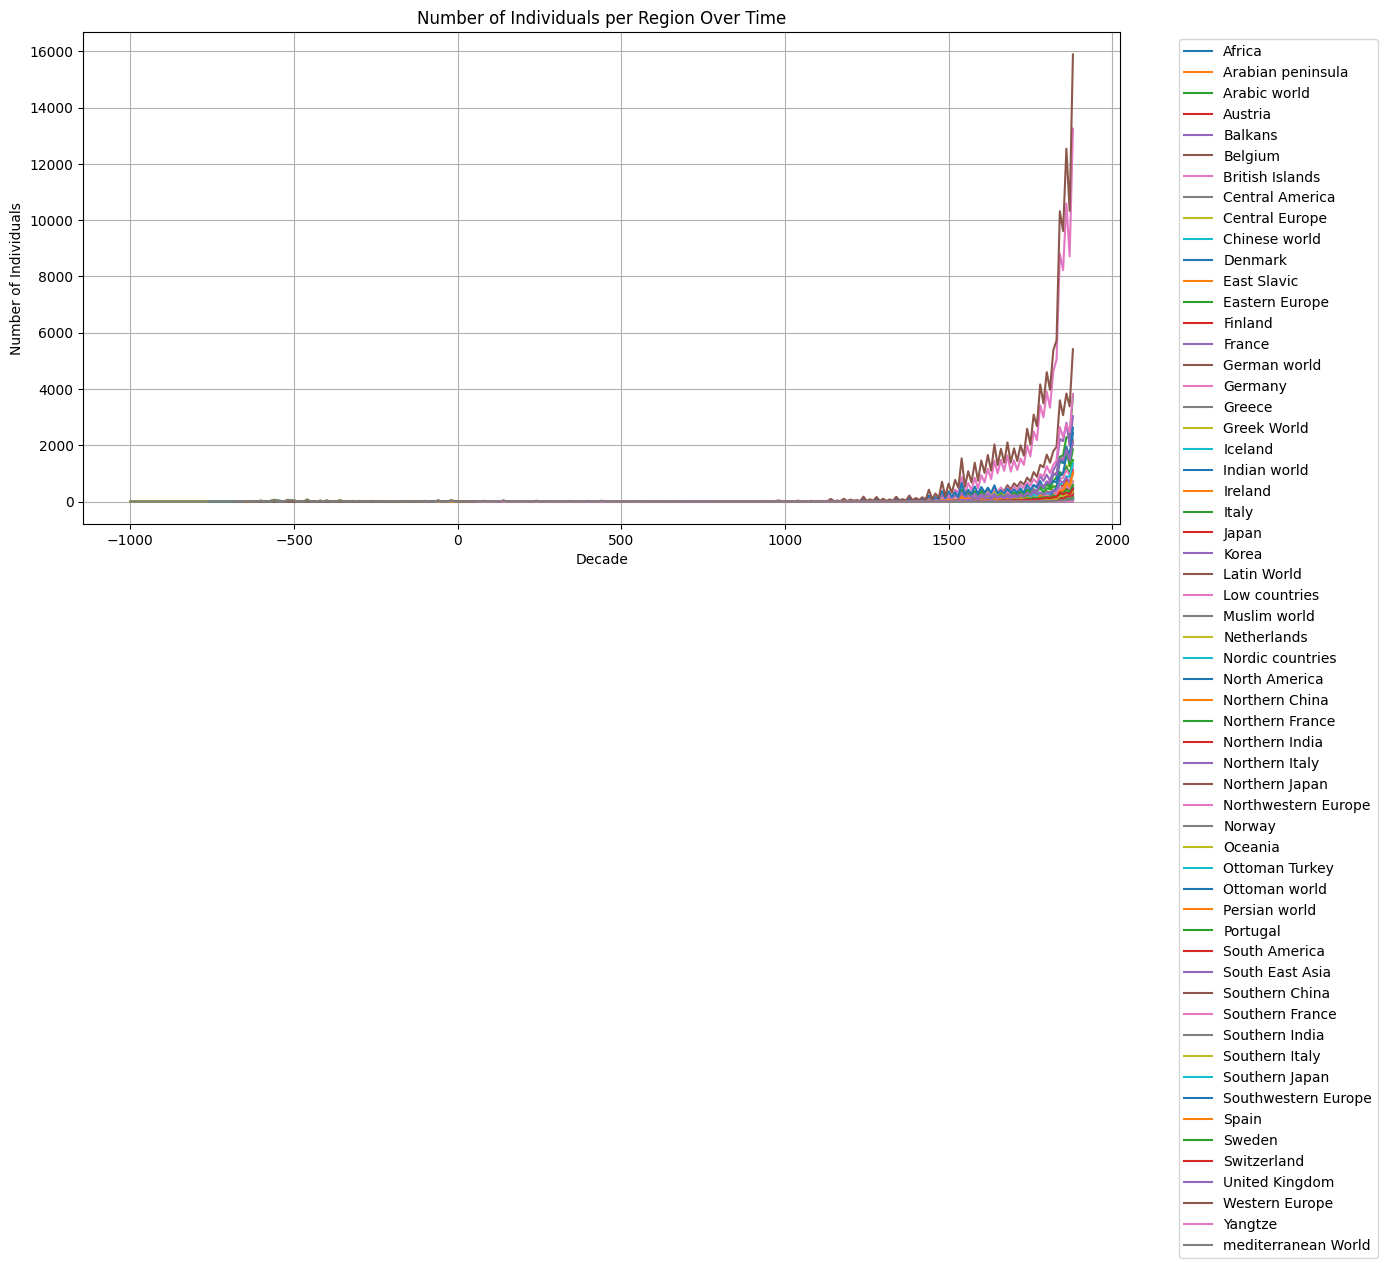

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

# Assuming the data is already loaded
# Let's count individuals per region per decade
region_decade_counts = data.groupby(['region_name', 'decade']).size().reset_index(name='count')

# Plot the number of individuals per region over time
plt.figure(figsize=(14, 10))
for region in region_decade_counts['region_name'].unique():
    subset = region_decade_counts[region_decade_counts['region_name'] == region]
    if len(subset) > 5:  # Only plot regions with enough data points
        plt.plot(subset['decade'], subset['count'], label=region)

plt.xlabel('Decade')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals per Region Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

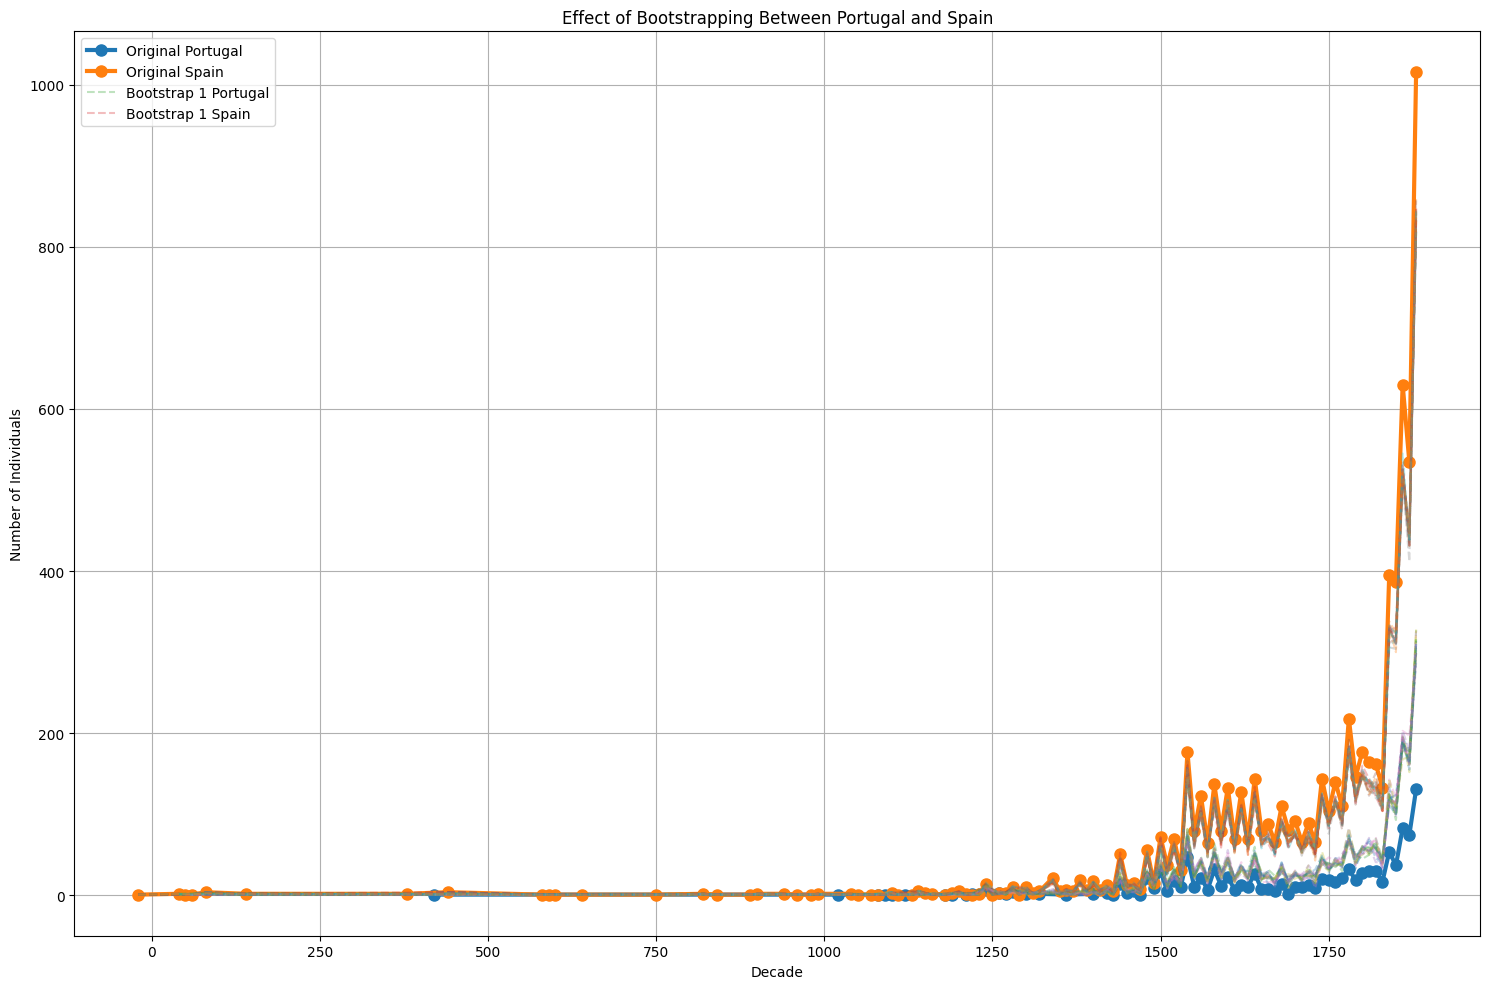

In [8]:
# Choose two neighboring regions for demonstration
# For example: 'Northwestern Europe' and 'Western Europe'
region1 = 'Portugal'
region2 = 'Spain'

# Function to perform bootstrap resampling between two regions
def bootstrap_regions(data, region1, region2, exchange_percent=0.2):
    # Create a copy of the data to avoid modifying the original
    df = data.copy()
    
    # Get indices of individuals in each region
    region1_indices = df[df['region_name'] == region1].index
    region2_indices = df[df['region_name'] == region2].index
    
    # Calculate number of individuals to exchange
    n_exchange1 = int(len(region1_indices) * exchange_percent)
    n_exchange2 = int(len(region2_indices) * exchange_percent)
    
    # Randomly select individuals to move from region1 to region2
    move_to_region2 = np.random.choice(region1_indices, n_exchange1, replace=False)
    
    # Randomly select individuals to move from region2 to region1
    move_to_region1 = np.random.choice(region2_indices, n_exchange2, replace=False)
    
    # Perform the exchange
    df.loc[move_to_region2, 'region_name'] = region2
    df.loc[move_to_region1, 'region_name'] = region1
    
    return df

# Run the bootstrap analysis multiple times
n_bootstraps = 20
original_counts = data.groupby(['region_name', 'decade']).size().reset_index(name='count')

plt.figure(figsize=(15, 10))

# Plot original data for the two regions
for region in [region1, region2]:
    subset = original_counts[original_counts['region_name'] == region]
    plt.plot(subset['decade'], subset['count'], 'o-', 
             linewidth=3, markersize=8, label=f'Original {region}')

# Plot bootstrapped data
for i in range(n_bootstraps):
    bootstrapped_data = bootstrap_regions(data, region1, region2)
    boot_counts = bootstrapped_data.groupby(['region_name', 'decade']).size().reset_index(name='count')
    
    for region in [region1, region2]:
        subset = boot_counts[boot_counts['region_name'] == region]
        plt.plot(subset['decade'], subset['count'], '--', alpha=0.3,
                 label=f'Bootstrap {i+1} {region}' if i == 0 else None)

plt.xlabel('Decade')
plt.ylabel('Number of Individuals')
plt.title(f'Effect of Bootstrapping Between {region1} and {region2}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:

# Example usage:
data = pd.read_csv('db_extract/df_individuals_score.csv', index_col=0)
data = data[data['region_name'].isin(['Spain', 'Portugal'])]


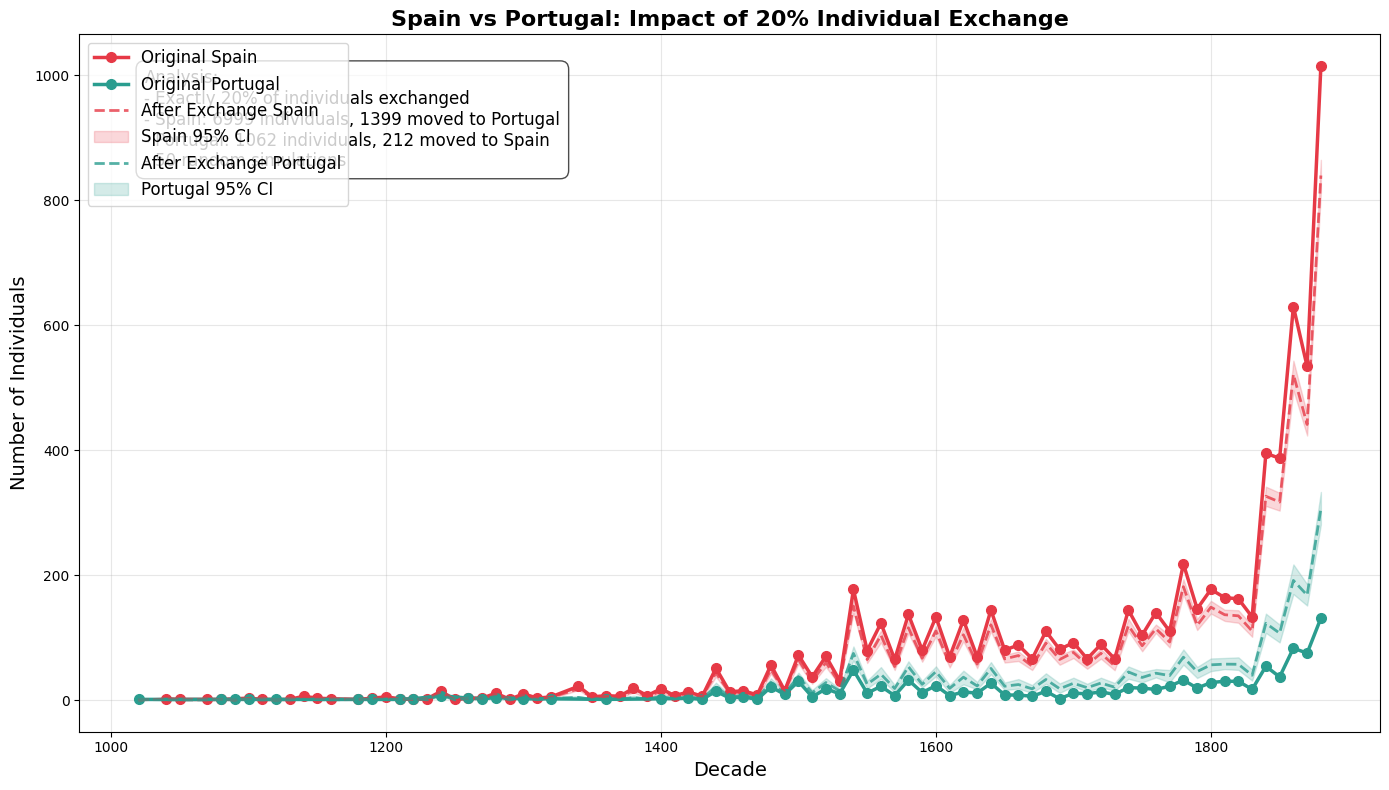